[How to Develop LSTM Models for Multi-Step Time Series Forecasting of Household Power Consumption](https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/)
===
This data represents a **multivariate time series** of power-related variables that in turn could be used to model and even forecast future electricity consumption.

Unlike other machine learning algorithms, **long short-term memory recurrent neural networks** are capable of automatically learning features from sequence data, support multiple-variate data, and can output a variable length sequences that can be used for multi-step forecasting.

In this tutorial, you will discover how to develop long short-term memory recurrent neural networks for multi-step time series forecasting of **household power consumption**.

After completing this tutorial, you will know:
- How to develop and evaluate Univariate and multivariate Encoder-Decoder LSTMs for multi-step time series forecasting.
- How to develop and evaluate an CNN-LSTM Encoder-Decoder model for multi-step time series forecasting.
- How to develop and evaluate a ConvLSTM Encoder-Decoder model for multi-step time series forecasting.

# Tutorial Overview

1. Problem Description
2. Load and Prepare Dataset
3. Model Evaluation
4. LSTMs for Multi-Step Forecasting
5. LSTM Model With Univariate Input and Vector Output
6. Encoder-Decoder LSTM Model With Univariate Input
7. Encoder-Decoder LSTM Model With Multivariate Input
8. CNN-LSTM Encoder-Decoder Model With Univariate Input
9. ConvLSTM Encoder-Decoder Model With Univariate Input

The first 3 parts are same as [How to Develop Convolutional Neural Networks for Multi-Step Time Series Forecasting](https://machinelearningmastery.com/how-to-develop-convolutional-neural-networks-for-multi-step-time-series-forecasting/) or my own `Keras_trying_v02_CNN.ipynb`.

In [1]:
from math import sqrt
# load and clean-up data
from pandas import read_csv
# split into standard weeks
from numpy import split
from numpy import array

# split a univariate dataset into train/test sets
def split_dataset(data):
	# split into standard weeks
	train, test = data[1:-328], data[-328:-6]
	# restructure into windows of weekly data
	train = array(split(train, len(train)/7))
	test = array(split(test, len(test)/7))
	return train, test

# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

# load the new file
dataset = read_csv('./input/household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
train, test = split_dataset(dataset.values)
# validate train data
print(train.shape)
print(train[0, 0, 0], train[-1, -1, 0])
# validate test
print(test.shape)
print(test[0, 0, 0], test[-1, -1, 0])

(159, 7, 8)
3390.46 1309.2679999999998
(46, 7, 8)
2083.4539999999984 2197.006000000004


# 4 LSTMs for Multi-Step Forecasting

Recurrent neural networks, or RNNs, are specifically designed to work, learn, and predict sequence data.

A recurrent neural network is a neural network where the output of the network from one time step is provided as an input in the subsequent time step. This allows the model to make a decision as to what to predict based on both the input for the current time step and direct knowledge of what was output in the prior time step.

Perhaps the most successful and widely used RNN is the long short-term memory network, or LSTM for short. It is successful because it overcomes the challenges involved in training a recurrent neural network, resulting in stable models. In addition to harnessing the recurrent connection of the outputs from the prior time step, LSTMs also have an internal memory that operates like a local variable, allowing them to accumulate state over the input sequence.

For more information about Recurrent Neural Networks, see the post:
- [Crash Course in Recurrent Neural Networks for Deep Learning](https://machinelearningmastery.com/crash-course-recurrent-neural-networks-deep-learning/)

For more information about Long Short-Term Memory networks, see the post:
- [A Gentle Introduction to Long Short-Term Memory Networks by the Experts](https://machinelearningmastery.com/gentle-introduction-long-short-term-memory-networks-experts/)

LSTMs offer a number of benefits when it comes to multi-step time series forecasting; they are:
- **Native Support for Sequences**. LSTMs are a type of recurrent network, and as such are designed to take sequence data as input, unlike other models where lag observations must be presented as input features.
- **Multivariate Inputs**. LSTMs directly support multiple parallel input sequences for multivariate inputs, unlike other models where multivariate inputs are presented in a flat structure.
- **Vector Output**. Like other neural networks, LSTMs are able to map input data directly to an output vector that may represent multiple output time steps.

Further, specialized architectures have been developed that are specifically designed to make multi-step sequence predictions, generally referred to as sequence-to-sequence prediction, or seq2seq for short. This is useful as multi-step time series forecasting is a type of seq2seq prediction.

An example of a recurrent neural network architecture designed for seq2seq problems is the encoder-decoder LSTM.

An encoder-decoder LSTM is a model comprised of two sub-models: one called the encoder that reads the input sequences and compresses it to a fixed-length internal representation, and an output model called the decoder that interprets the internal representation and uses it to predict the output sequence.

The encoder-decoder approach to sequence prediction has proven much more effective than outputting a vector directly and is the preferred approach.

Generally, LSTMs have been found to not be very effective at auto-regression type problems. These are problems where forecasting the next time step is a function of recent time steps.

For more on this issue, see the post:
- [On the Suitability of LSTMs for Time Series Forecasting](https://machinelearningmastery.com/suitability-long-short-term-memory-networks-time-series-forecasting/)

One-dimensional convolutional neural networks, or CNNs, have proven effective at automatically learning features from input sequences.

A popular approach has been to combine CNNs with LSTMs, where the CNN is as an encoder to learn features from sub-sequences of input data which are provided as time steps to an LSTM. This architecture is called a [CNN-LSTM](https://machinelearningmastery.com/cnn-long-short-term-memory-networks/).

For more information on this architecture, see the post:
- [CNN Long Short-Term Memory Networks](https://machinelearningmastery.com/cnn-long-short-term-memory-networks/)

A power variation on the CNN LSTM architecture is the ConvLSTM that uses the convolutional reading of input subsequences directly within an LSTM’s units. This approach has proven very effective for time series classification and can be adapted for use in multi-step time series forecasting.

In this tutorial, we will explore a suite of LSTM architectures for multi-step time series forecasting. Specifically, we will look at how to develop the following models:
- **LSTM** model with vector output for multi-step forecasting with univariate input data.
- **Encoder-Decoder LSTM** model for multi-step forecasting with univariate input data.
- **Encoder-Decoder LSTM** model for multi-step forecasting with multivariate input data.
- **CNN-LSTM Encoder-Decoder** model for multi-step forecasting with univariate input data.
- **ConvLSTM Encoder-Decoder** model for multi-step forecasting with univariate input data.

The models will be developed and demonstrated on the household power prediction problem. A model is considered skillful if it achieves performance better than a naive model, which is an overall RMSE of about 465 kilowatts across a seven day forecast.

We will not focus on the tuning of these models to achieve optimal performance; instead, we will stop short at skillful models as compared to a naive forecast. The chosen structures and hyperparameters are chosen with a little trial and error. The scores should be taken as just an example rather than a study of the optimal model or configuration for the problem.

Given the stochastic nature of the models, it is [good practice](https://machinelearningmastery.com/evaluate-skill-deep-learning-models/) to evaluate a given model multiple times and report the mean performance on a test dataset. In the interest of brevity and keeping the code simple, we will instead present single-runs of models in this tutorial.

We cannot know which approach will be the most effective for a given multi-step forecasting problem. It is a good idea to explore a suite of methods in order to discover what works best on your specific dataset.
# 5 LSTM Model With Univariate Input and Vector Output

We will start off by developing a simple or vanilla LSTM model that reads in a sequence of days of total daily power consumption and predicts a vector output of the next standard week of daily power consumption.

This will provide the foundation for the more elaborate models developed in subsequent sections.

The number of prior days used as input defines the one-dimensional (1D) subsequence of data that the LSTM will read and learn to extract features. Some ideas on the size and nature of this input include:
- All prior days, up to years worth of data.
- The prior seven days.
- The prior two weeks.
- The prior one month.
- The prior one year.
- The prior week and the week to be predicted from one year ago.

There is no right answer; instead, each approach and more can be tested and the performance of the model can be used to choose the nature of the input that results in the best model performance.

These choices define a few things:
- How the training data must be prepared in order to fit the model.
- How the test data must be prepared in order to evaluate the model.
- How to use the model to make predictions with a final model in the future.

A good starting point would be to use the prior seven days.

An LSTM model expects data to have the shape:
```
[samples, timesteps, features]
```
One sample will be comprised of seven time steps with one feature for the seven days of total daily power consumed.

The training dataset has 159 weeks of data, so the shape of the training dataset would be:
```
[159, 7, 1]
```
This is a good start. The data in this format would use the prior standard week to predict the next standard week. A problem is that 159 instances is not a lot to train a neural network.

A way to create a lot more training data is to change the problem during training to predict the next seven days given the prior seven days, regardless of the standard week.

This only impacts the training data, and the test problem remains the same: predict the daily power consumption for the next standard week given the prior standard week.

This will require a little preparation of the training data.

The training data is provided in standard weeks with eight variables, specifically in the shape \[159, 7, 8\]. The first step is to flatten the data so that we have eight time series sequences.
```python
# flatten data
data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
```
We then need to iterate over the time steps and divide the data into overlapping windows; each iteration moves along one time step and predicts the subsequent seven days.

For example:
```
Input, Output
[d01, d02, d03, d04, d05, d06, d07], [d08, d09, d10, d11, d12, d13, d14]
[d02, d03, d04, d05, d06, d07, d08], [d09, d10, d11, d12, d13, d14, d15]
...
```
We can do this by keeping track of start and end indexes for the inputs and outputs as we iterate across the length of the flattened data in terms of time steps.

We can also do this in a way where the number of inputs and outputs are parameterized (e.g. n_input, n_out) so that you can experiment with different values or adapt it for your own problem.

Below is a function named to_supervised() that takes a list of weeks (history) and the number of time steps to use as inputs and outputs and returns the data in the overlapping moving window format.

In [2]:
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM

# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, 0]
	# reshape into [1, n_input, 1]
	input_x = input_x.reshape((1, len(input_x), 1))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

# evaluate a single model
def evaluate_model(train, test, n_input):
	# fit model
	model = build_model(train, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

Using TensorFlow backend.


In [3]:
# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end < len(data):
			x_input = data[in_start:in_end, 0]
			x_input = x_input.reshape((len(x_input), 1))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)

When we run this function on the entire training dataset, we transform 159 samples into 1,099; specifically, the transformed dataset has the shapes `X=[1099, 7, 1]` and `y=[1099, 7]`.

Next, we can define and fit the LSTM model on the training data.

This multi-step time series forecasting problem is an autoregression. That means it is likely best modeled where that the next seven days is some function of observations at prior time steps. This and the relatively small amount of data means that a small model is required.

We will develop a model with a single hidden LSTM layer with 200 units. The number of units in the hidden layer is unrelated to the number of time steps in the input sequences. The LSTM layer is followed by a fully connected layer with 200 nodes that will interpret the features learned by the LSTM layer. Finally, an output layer will directly predict a vector with seven elements, one for each day in the output sequence.

We will use the mean squared error loss function as it is a good match for our chosen error metric of RMSE. We will use the efficient [ADAM](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) implementation of stochastic gradient descent and fit the model for 70 epochs with a batch size of 16.

The small batch size and the stochastic nature of the algorithm means that the same model will learn a slightly different mapping of inputs to outputs each time it is trained. This means results may vary when the model is evaluated. You can try running the model multiple times and calculate an average of model performance.

The **build_model()** below prepares the training data, defines the model, and fits the model on the training data, returning the fit model ready for making predictions.

In [4]:
# train the model
def build_model(train, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 70, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# define model
	model = Sequential()
	model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

Now that we know how to fit the model, we can look at how the model can be used to make a prediction.

Generally, the model expects data to have the same three dimensional shape when making a prediction.

In this case, the expected shape of an input pattern is one sample, seven days of one feature for the daily power consumed:
```
[1, 7, 1]
```
Data must have this shape when making predictions for the test set and when a final model is being used to make predictions in the future. If you change the number if input days to 14, then the shape of the training data and the shape of new samples when making predictions must be changed accordingly to have 14 time steps. It is a modeling choice that you must carry forward when using the model.

We are using walk-forward validation to evaluate the model as described in the previous section.

This means that we have the observations available for the prior week in order to predict the coming week. These are collected into an array of standard weeks called history.

In order to predict the next standard week, we need to retrieve the last days of observations. As with the training data, we must first flatten the history data to remove the weekly structure so that we end up with eight parallel time series.
```python
# flatten data
data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
```
Next, we need to retrieve the last seven days of daily total power consumed (feature index 0).

We will parameterize this as we did for the training data so that the number of prior days used as input by the model can be modified in the future.
```python
# retrieve last observations for input data
input_x = data[-n_input:, 0]
```
Next, we reshape the input into the expected three-dimensional structure.
```python
# reshape into [1, n_input, 1]
input_x = input_x.reshape((1, len(input_x), 1))
```
We then make a prediction using the fit model and the input data and retrieve the vector of seven days of output.
```python
# forecast the next week
yhat = model.predict(input_x, verbose=0)
# we only want the vector forecast
yhat = yhat[0]
```
The **forecast()** function below implements this and takes as arguments the model fit on the training dataset, the history of data observed so far, and the number of input time steps expected by the model.

That’s it; we now have everything we need to make multi-step time series forecasts with an LSTM model on the daily total power consumed univariate dataset.

In [5]:
# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, 0]
	# reshape into [1, n_input, 1]
	input_x = input_x.reshape((1, len(input_x), 1))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

We can see that in this case, the model was skillful as compared to a naive forecast, achieving an overall RMSE of about 399 kilowatts, less than 465 kilowatts achieved by a naive model.
```
lstm: [399.456] 419.4, 422.1, 384.5, 395.1, 403.9, 317.7, 441.5
```
The plot shows that perhaps Tuesdays and Fridays are easier days to forecast than the other days and that perhaps Saturday at the end of the standard week is the hardest day to forecast.

lstm: [400.370] 416.3, 416.6, 368.7, 399.6, 405.9, 312.7, 465.8


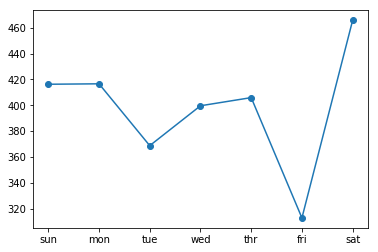

In [6]:
from matplotlib import pyplot
%matplotlib inline

# evaluate model and get scores
n_input = 7
score, scores = evaluate_model(train, test, n_input)
# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.show()

We can increase the number of prior days to use as input from seven to 14 by changing the n_input variable.
```python
# evaluate model and get scores
n_input = 14
```
Re-running the example with this change first prints a summary of performance of the model.

Your specific results may vary; try running the example a few times.

In this case, we can see a further drop in the overall RMSE to about 370 kilowatts, suggesting that further tuning of the input size and perhaps the number of nodes in the model may result in better performance.
```
lstm: [370.028] 387.4, 377.9, 334.0, 371.2, 367.1, 330.4, 415.1
```
Comparing the per-day RMSE scores we see some are better and some are worse than using seven-day inputs.

This may suggest benefit in using the two different sized inputs in some way, such as an ensemble of the two approaches or perhaps a single model (e.g. a multi-headed model) that reads the training data in different ways.

# 6 Encoder-Decoder LSTM Model With Univariate Input

In this section, we can update the vanilla LSTM to use an encoder-decoder model.

This means that the model will not output a vector sequence directly. Instead, the model will be comprised of two sub models, the encoder to read and encode the input sequence, and the decoder that will read the encoded input sequence and make a one-step prediction for each element in the output sequence.

The difference is subtle, as in practice both approaches do in fact predict a sequence output.

The important difference is that an LSTM model is used in the decoder, allowing it to both know what was predicted for the prior day in the sequence and accumulate internal state while outputting the sequence.

Let’s take a closer look at how this model is defined.

As before, we define an LSTM hidden layer with 200 units. This is the decoder model that will read the input sequence and will output a 200 element vector (one output per unit) that captures features from the input sequence. We will use 14 days of total power consumption as input.
```python
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
```
We will use a simple encoder-decoder architecture that is easy to implement in Keras, that has a lot of similarity to the architecture of an LSTM autoencoder.

First, the internal representation of the input sequence is repeated multiple times, once for each time step in the output sequence. This sequence of vectors will be presented to the LSTM decoder.
```python
model.add(RepeatVector(7))
```
We then define the decoder as an LSTM hidden layer with 200 units. Importantly, the decoder will output the entire sequence, not just the output at the end of the sequence as we did with the encoder. This means that each of the 200 units will output a value for each of the seven days, representing the basis for what to predict for each day in the output sequence.
```python
model.add(LSTM(200, activation='relu', return_sequences=True))
```
We will then use a fully connected layer to interpret each time step in the output sequence before the final output layer. Importantly, the output layer predicts a single step in the output sequence, not all seven days at a time,

This means that we will use the same layers applied to each step in the output sequence. It means that the same fully connected layer and output layer will be used to process each time step provided by the decoder. To achieve this, we will wrap the interpretation layer and the output layer in a [TimeDistributed wrapper](https://machinelearningmastery.com/timedistributed-layer-for-long-short-term-memory-networks-in-python/) that allows the wrapped layers to be used for each time step from the decoder.
```python
model.add(TimeDistributed(Dense(100, activation='relu')))
model.add(TimeDistributed(Dense(1)))
```
This allows the LSTM decoder to figure out the context required for each step in the output sequence and the wrapped dense layers to interpret each time step separately, yet reusing the same weights to perform the interpretation. An alternative would be to flatten all of the structure created by the LSTM decoder and to output the vector directly. You can try this as an extension to see how it compares.

The network therefore outputs a three-dimensional vector with the same structure as the input, with the dimensions `[samples, timesteps, features]`.

There is a single feature, the daily total power consumed, and there are always seven features. A single one-week prediction will therefore have the size: `[1, 7, 1]`.

Therefore, when training the model, we must restructure the output data (y) to have the three-dimensional structure instead of the two-dimensional structure of `[samples, features]` used in the previous section.
```python
# reshape output into [samples, timesteps, features]
train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
```
We can tie all of this together into the updated build_model() function listed below.

In [7]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

# train the model
def build_model(train, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 20, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	# define model
	model = Sequential()
	model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(200, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(100, activation='relu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

Running the example fits the model and summarizes the performance on the test dataset.

Your specific results may vary given the stochastic nature of the algorithm. You may want to try running the example a few times.

We can see that in this case, the model is skillful, achieving an overall RMSE score of about 372 kilowatts.
```
lstm: [372.595] 379.5, 399.8, 339.6, 372.2, 370.9, 309.9, 424.8
```

lstm: [409.147] 453.8, 391.0, 350.2, 424.8, 384.0, 326.4, 505.9


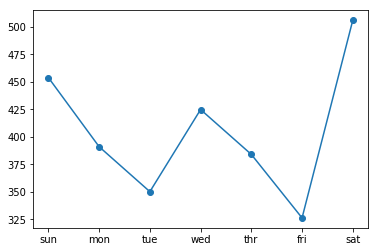

In [8]:
n_input = 14
score, scores = evaluate_model(train, test, n_input)
# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.show()

# 7 Encoder-Decoder LSTM Model With Multivariate Input

In this section, we will update the Encoder-Decoder LSTM developed in the previous section to use each of the eight time series variables to predict the next standard week of daily total power consumption.

We will do this by providing each one-dimensional time series to the model as a separate sequence of input.

The LSTM will in turn create an internal representation of each input sequence that will together be interpreted by the decoder.

Using multivariate inputs is helpful for those problems where the output sequence is some function of the observations at prior time steps from multiple different features, not just (or including) the feature being forecasted. It is unclear whether this is the case in the power consumption problem, but we can explore it nonetheless.

First, we must update the preparation of the training data to include all of the eight features, not just the one total daily power consumed. It requires a single line change:
```python
X.append(data[in_start:in_end, :])
```
The complete **to_supervised()** function with this change is listed below.

In [9]:
# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end < len(data):
			X.append(data[in_start:in_end, :])
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)

We also must update the function used to make forecasts with the fit model to use all eight features from the prior time steps.

Again, another small change:
```python
# retrieve last observations for input data
input_x = data[-n_input:, :]
# reshape into [1, n_input, n]
input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
```
The complete forecast() function with this change is listed below:

In [10]:
# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, :]
	# reshape into [1, n_input, n]
	input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

The same model architecture and configuration is used directly, although we will increase the number of training epochs from 20 to 50 given the 8-fold increase in the amount of input data.

Running the example fits the model and summarizes the performance on the test dataset.

Experimentation found that this model appears less stable than the univariate case and may be related to the differing scales of the input eight variables.

Your specific results may vary given the stochastic nature of the algorithm. You may want to try running the example a few times.

We can see that in this case, the model is skillful, achieving an overall RMSE score of about 376 kilowatts.
```
lstm: [376.273] 378.5, 381.5, 328.4, 388.3, 361.2, 308.0, 467.2
```

lstm: [415.519] 424.6, 412.5, 397.3, 438.5, 382.1, 332.0, 501.9


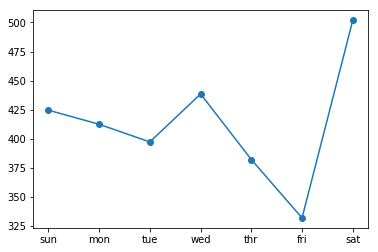

In [11]:
# evaluate model and get scores
n_input = 14
score, scores = evaluate_model(train, test, n_input)
# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.show()

# 8 CNN-LSTM Encoder-Decoder Model With Univariate Input

A convolutional neural network, or CNN, can be used as the encoder in an encoder-decoder architecture.

The CNN does not directly support sequence input; instead, a 1D CNN is capable of reading across sequence input and automatically learning the salient features. These can then be interpreted by an LSTM decoder as per normal. We refer to hybrid models that use a CNN and LSTM as [CNN-LSTM models](https://machinelearningmastery.com/cnn-long-short-term-memory-networks/), and in this case we are using them together in an encoder-decoder architecture.

The CNN expects the input data to have the same 3D structure as the LSTM model, although multiple features are read as different channels that ultimately have the same effect.

We will simplify the example and focus on the CNN-LSTM with univariate input, but it can just as easily be updated to use multivariate input, which is left as an exercise.

As before, we will use input sequences comprised of 14 days of daily total power consumption.

We will define a simple but effective CNN architecture for the encoder that is comprised of two convolutional layers followed by a max pooling layer, the results of which are then flattened.

The first convolutional layer reads across the input sequence and projects the results onto feature maps. The second performs the same operation on the feature maps created by the first layer, attempting to amplify any salient features. We will use 64 feature maps per convolutional layer and read the input sequences with a kernel size of three time steps.

The max pooling layer simplifies the feature maps by keeping 1/4 of the values with the largest (max) signal. The distilled feature maps after the pooling layer are then flattened into one long vector that can then be used as input to the decoding process.
```python
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
```
The decoder is the same as was defined in previous sections.

The only other change is to set the number of training epochs to 20.

The **build_model()** function with these changes is listed below.

In [12]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# train the model
def build_model(train, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 20, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	# define model
	model = Sequential()
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(200, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(100, activation='relu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

Running the example fits the model and summarizes the performance on the test dataset.

A little experimentation showed that using two convolutional layers made the model more stable than using just a single layer.

Your specific results may vary given the stochastic nature of the algorithm. You may want to try running the example a few times.

We can see that in this case the model is skillful, achieving an overall RMSE score of about 372 kilowatts.
```
lstm: [372.055] 383.8, 381.6, 339.1, 371.8, 371.8, 319.6, 427.2
```

lstm: [728.050] 488.1, 580.0, 596.9, 735.5, 848.7, 918.0, 821.8


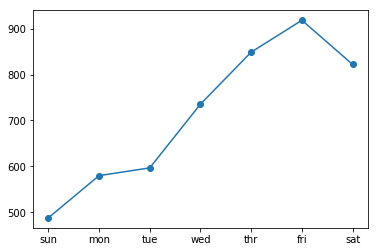

In [13]:
# evaluate model and get scores
n_input = 14
score, scores = evaluate_model(train, test, n_input)
# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.show()

# 9 ConvLSTM Encoder-Decoder Model With Univariate Input

A further extension of the CNN-LSTM approach is to perform the convolutions of the CNN (e.g. how the CNN reads the input sequence data) as part of the LSTM for each time step.

This combination is called a Convolutional LSTM, or ConvLSTM for short, and like the CNN-LSTM is also used for spatio-temporal data.

Unlike an LSTM that reads the data in directly in order to calculate internal state and state transitions, and unlike the CNN-LSTM that is interpreting the output from CNN models, the ConvLSTM is using convolutions directly as part of reading input into the LSTM units themselves.

For more information for how the equations for the ConvLSTM are calculated within the LSTM unit, see the paper:
- [Convolutional LSTM Network: A Machine Learning Approach for Precipitation Nowcasting, 2015.](https://arxiv.org/abs/1506.04214v1)

The Keras library provides the [`ConvLSTM2D`](https://keras.io/layers/recurrent/#convlstm2d) class that supports the ConvLSTM model for 2D data. It can be configured for 1D multivariate time series forecasting.

The ConvLSTM2D class, by default, expects input data to have the shape:
```
[samples, timesteps, rows, cols, channels]
```
Where each time step of data is defined as an image of (rows * columns) data points.

We are working with a one-dimensional sequence of total power consumption, which we can interpret as one row with 14 columns, if we assume that we are using two weeks of data as input.

For the ConvLSTM, this would be a single read: that is, the LSTM would read one time step of 14 days and perform a convolution across those time steps.

This is not ideal.

Instead, we can split the 14 days into two subsequences with a length of seven days. The ConvLSTM can then read across the two time steps and perform the CNN process on the seven days of data within each.

For this chosen framing of the problem, the input for the ConvLSTM2D would therefore be:
```
[n, 2, 1, 7, 1]
```
Or:
- **Samples**: n, for the number of examples in the training dataset.
- **Time**: 2, for the two subsequences that we split a window of 14 days into.
- **Rows**: 1, for the one-dimensional shape of each subsequence.
- **Columns**: 7, for the seven days in each subsequence.
- **Channels**: 1, for the single feature that we are working with as input.

You can explore other configurations, such as providing 21 days of input split into three subsequences of seven days, and/or providing all eight features or channels as input.

We can now prepare the data for the ConvLSTM2D model.

First, we must reshape the training dataset into the expected structure of `[samples, timesteps, rows, cols, channels]`.
```python
# reshape into subsequences [samples, time steps, rows, cols, channels]
train_x = train_x.reshape((train_x.shape[0], n_steps, 1, n_length, n_features))
```
We can then define the encoder as a ConvLSTM hidden layer followed by a flatten layer ready for decoding.
```python
model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))
model.add(Flatten())
```
We will also parameterize the number of subsequences (n_steps) and the length of each subsequence (n_length) and pass them as arguments.

The rest of the model and training is the same. The **build_model()** function with these changes is listed below.

In [14]:
from keras.layers import ConvLSTM2D

# train the model
def build_model(train, n_steps, n_length, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 20, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# reshape into subsequences [samples, time steps, rows, cols, channels]
	train_x = train_x.reshape((train_x.shape[0], n_steps, 1, n_length, n_features))
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	# define model
	model = Sequential()
	model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))
	model.add(Flatten())
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(200, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(100, activation='relu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

This model expects five-dimensional data as input. Therefore, we must also update the preparation of a single sample in the **forecast()** function when making a prediction.
```python
# reshape into [samples, time steps, rows, cols, channels]
input_x = input_x.reshape((1, n_steps, 1, n_length, 1))
```
The **forecast()** function with this change and with the parameterized subsequences is provided below.

In [19]:
# make a forecast
def forecast(model, history, n_steps, n_length, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, 0]
	# reshape into [samples, time steps, rows, cols, channels]
	input_x = input_x.reshape((1, n_steps, 1, n_length, 1))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

# evaluate a single model
def evaluate_model(train, test, n_steps, n_length, n_input):
	# fit model
	model = build_model(train, n_steps, n_length, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_steps, n_length, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end < len(data):
			x_input = data[in_start:in_end, 0]
			x_input = x_input.reshape((len(x_input), 1))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)

We now have all of the elements for evaluating an encoder-decoder architecture for multi-step time series forecasting where a ConvLSTM is used as the encoder.

Running the example fits the model and summarizes the performance on the test dataset.

A little experimentation showed that using two convolutional layers made the model more stable than using just a single layer.

We can see that in this case the model is skillful, achieving an overall RMSE score of about 367 kilowatts.
```
lstm: [367.929] 416.3, 379.7, 334.7, 362.3, 374.7, 284.8, 406.7
```

lstm: [387.407] 396.2, 414.0, 359.9, 380.1, 374.1, 335.0, 442.7


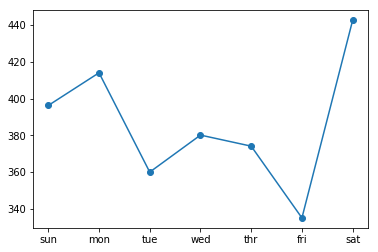

In [20]:
# define the number of subsequences and the length of subsequences
n_steps, n_length = 2, 7
# define the total days to use as input
n_input = n_length * n_steps
score, scores = evaluate_model(train, test, n_steps, n_length, n_input)
# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.show()

# Extensions

This section lists some ideas for extending the tutorial that you may wish to explore.
- **Size of Input**. Explore more or fewer number of days used as input for the model, such as three days, 21 days, 30 days, and more.
- **Model Tuning**. Tune the structure and hyperparameters for a model and further lift model performance on average.
- **Data Scaling**. Explore whether data scaling, such as standardization and normalization, can be used to improve the performance of any of the LSTM models.
- **Learning Diagnostics**. Use diagnostics such as learning curves for the train and validation loss and mean squared error to help tune the structure and hyperparameters of a LSTM model.
# Summary

In this tutorial, you discovered how to develop long short-term memory recurrent neural networks for multi-step time series forecasting of household power consumption.

Specifically, you learned:
- How to develop and evaluate Univariate and multivariate Encoder-Decoder LSTMs for multi-step time series forecasting.
- How to develop and evaluate an CNN-LSTM Encoder-Decoder model for multi-step time series forecasting.
- How to develop and evaluate a ConvLSTM Encoder-Decoder model for multi-step time series forecasting.
